# Project Planning Stage(individual)

### 1. Data Description 
Two files were collected by a research group in Computer Science at UBC, to help us complete our project. One contains **196** players' information; the other one records **1535** playing sessions.

The 7 columns in the 'players.csv' dataset are:
- `experience` - Experience level
- `subscribe` - The subscription state of the player
- `hashedEmail` - The hashed email address of the player
- `played_hours` - Time the player spent on the game(in hours)
- `name` - Name
- `gender` - Gender
- `Age` - Age

The 5 columns in the 'sessions.csv' dataset are:
- `hashedEmail` - The hashed email address of the player
- `start_time` - Start time of the session
- `end_time` - End time of the session
- `original_start_time` - Original start time of the session
- `original_end_time` - Original end time of the session

Note:
We need to notice that some cells are missing information or provide invalid information, which may cause some compiling failures in our coding process or lead to some errors.
Also, as we previewed the dataset, the sample size of 'Pro' in the 'experience' column is too small, which may cause some trouble when we do the final calculation.

### 2. Questions
The broad question that I'm willing to choose is Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

I come up with a specific question: Can the amount of time a player spends playing the game (played_hours) and their age (Age) predict their experience level (Beginner, Amateur, Regular, Veteran, Pro) in the Minecraft research server dataset?

### 3. Exploratory Data Analysis and Visualization
#### 3.1 Attaching core packages

In [100]:
library(tidyverse)
library(tidymodels)
library(repr)

#### 3.2 Load the dataset into R

In [101]:
players_origin <- read_csv("dsci-100-student/players.csv") |>
mutate(experience = as_factor(experience))

players_summary <- players_origin |>
select(played_hours, Age) |>
map_dfr(mean, na.rm = TRUE)

players <- players_origin |>
select(experience, played_hours, Age) |>
filter(!is.na(Age))

glimpse(players_origin)
players_summary
glimpse(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


Rows: 194
Columns: 3
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


#### 3.3 Draw the overview graph
The graph shows that it is somewhat unlikely that age and the time the player spent on the game(in hours) will predict the true experience level. 

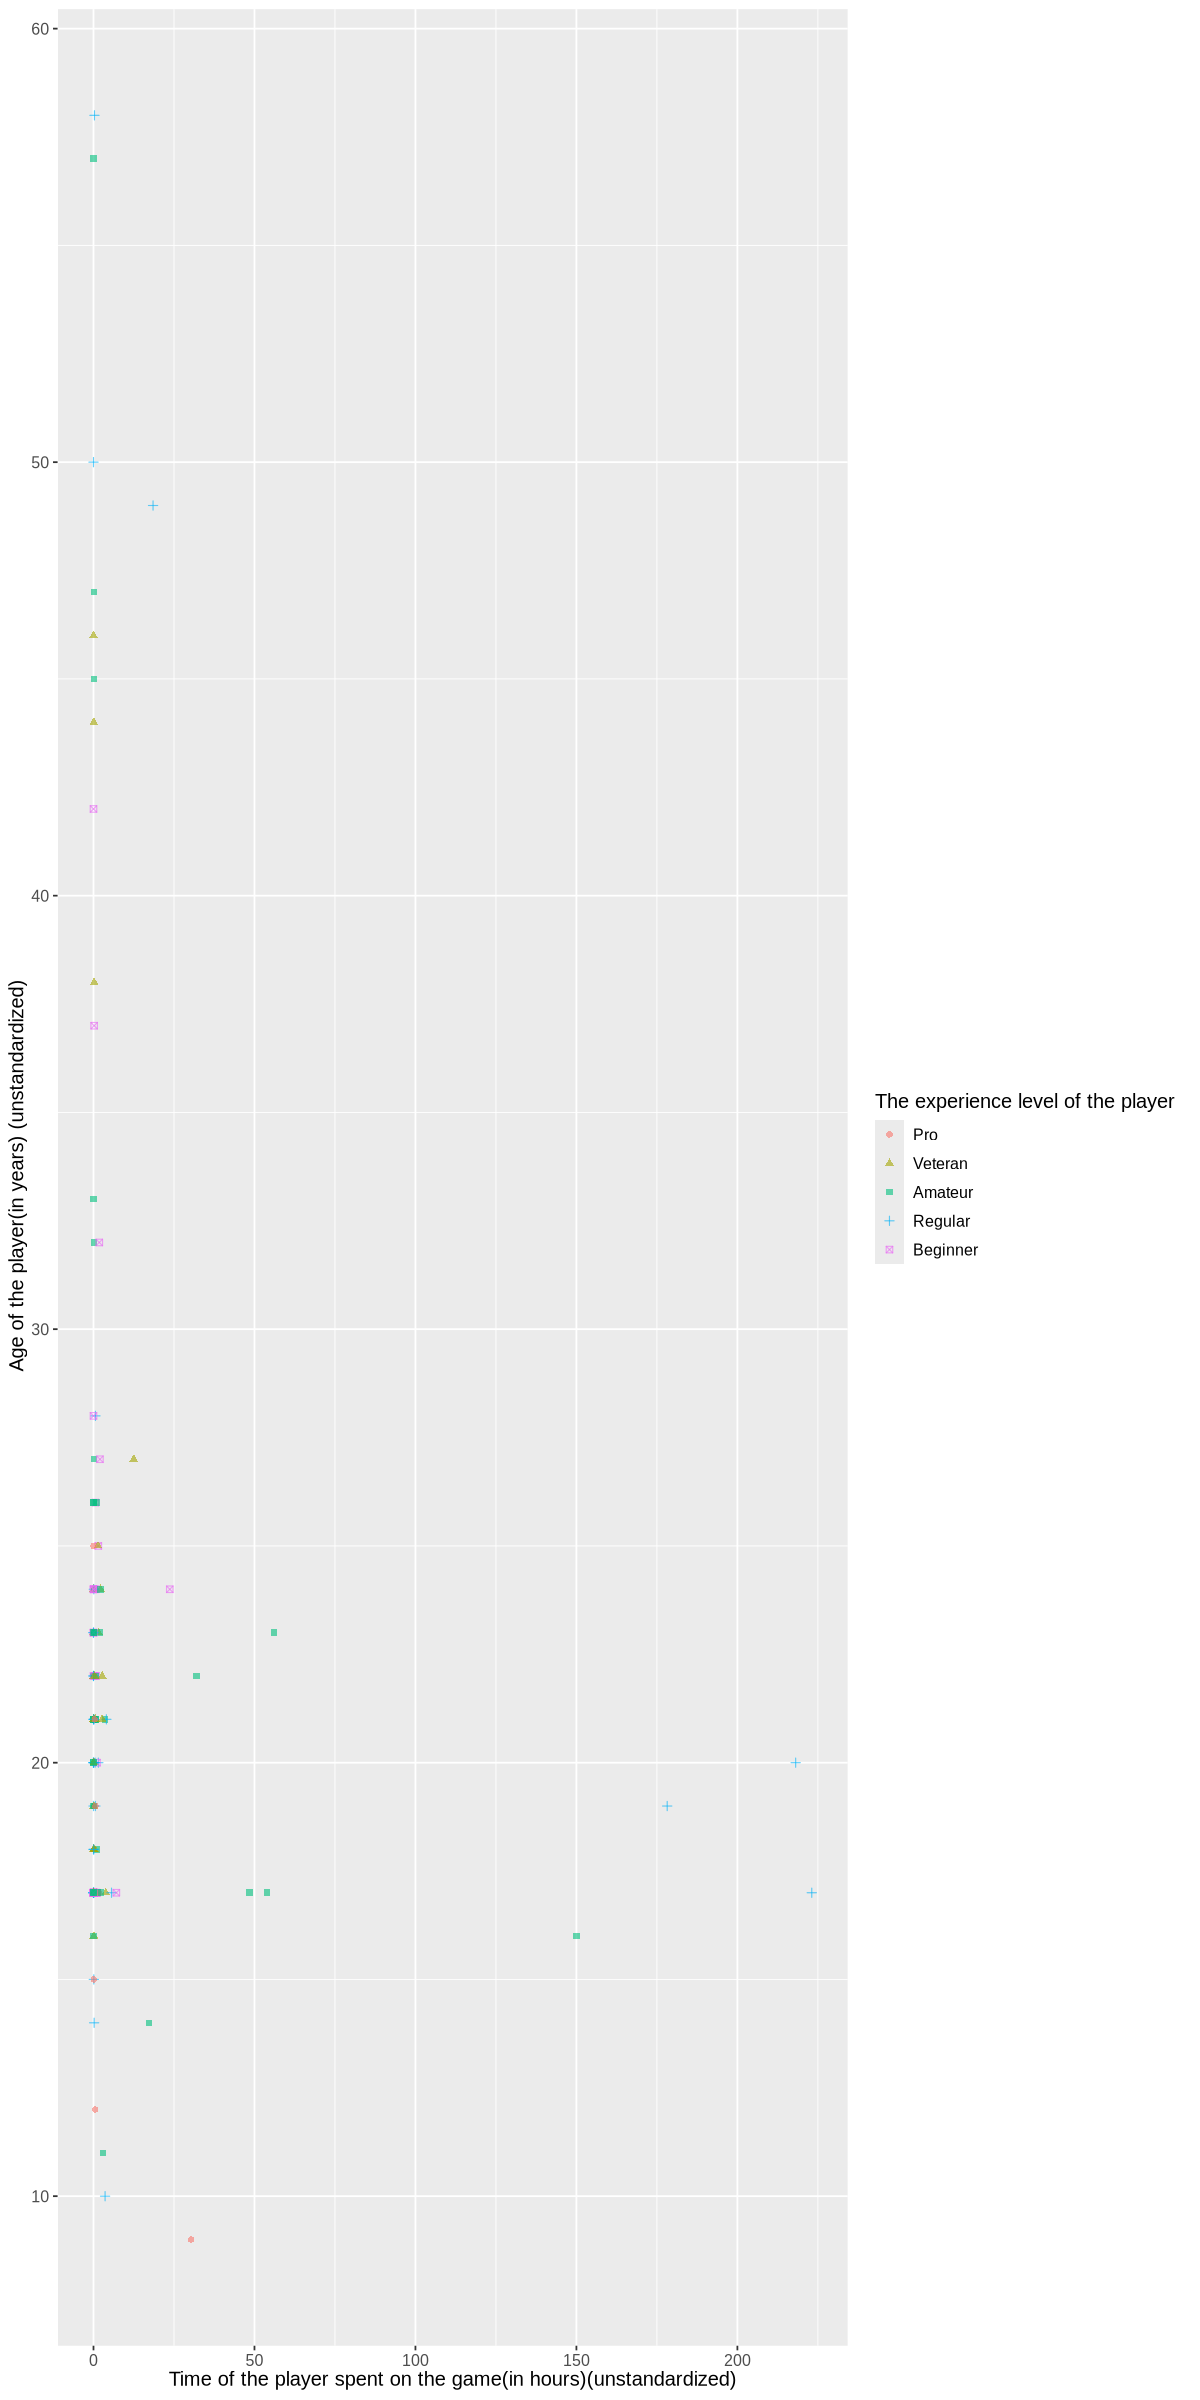

In [102]:
options(repr.plot.height = 20, repr.plot.width = 10)
players_overview <- players |>
  ggplot(aes(x = played_hours, y = Age, color = experience, shape = experience)) +
  geom_point(alpha = 0.6) +
  labs(x = "Time of the player spent on the game(in hours)(unstandardized)",
       y = " Age of the player(in years) (unstandardized)",
       color = "The experience level of the player",
       shape = "The experience level of the player") +
  theme(text = element_text(size = 12))
players_overview

### 4. Methods and Plan
**Proposed Method:** K-Nearest Neighbors(K-NN) Classification

#### 4.1 Why K-NN is Appropriate
(1) K-NN can capture complex patterns between play time, age and experience level without assuming specific functional forms

(2) By using the k-nn classification, we don't need strong statistical assumptions about the data distribution.

#### 4.2 Potential limitations
(1) Prediction time increases with training set size

(2) Outliers in played_hours may mislead classification

#### 4.3 Model Development Plan
(1)**Setting**
- Set seed for splitting data in order to ensure the reproducibility of the process.
- Remove invalid observations(NA).
- Standardize predictors('played_hours' and 'Age')
- Split the data with the proportion 0.7, which means 70% for training, 30% for testing.
- Ensure proportional representation of all experience levels.
  
(2)**Tuning**
- Use cross-validation with 5-fold CV on the training set to find the best k value for building the model specification.
- Try the k value from 1 to 30, step by 1.
  
(3)**Evaluation**
- Apply the best k value and find out the accuracy, precision, and recall of the model
- Make and analyze a confusion matrix